In [20]:
# imports

import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt


In [21]:
# load in data

fast_dat = pd.read_csv('Fast Food Chain_Labeled - Sheet1.csv')
#fast_dat = fast_dat[]


zip_dat = pd.read_csv('ZipData.csv')
oc_data = zip_dat[zip_dat['County']=='ORANGE']
oc_data.head()

,RecordID,ZipCode,City,County,State,Latitude,Longitude,DominantAreaCode,ResidentialDeliveries,ResidentialPOBoxes,...,MedianHomeValue,MedianAge,MedianAgeMale,MedianAgeFemale,EducationNinthGradeOrLess,EducationSomeHighSchool,EducationHighSchoolGraduate,EducationSomeCollegeWithoutDiploma,EducationAssociatesDegree,EducationBachelorsDegree
235,236,90620,BUENA PARK,ORANGE,CA,33.8425,-118.0124,714,13804,0,...,806000.0,37.2,36.2,38.4,1762,2280,8709,9540,3239,8044
236,237,90621,BUENA PARK,ORANGE,CA,33.8706,-117.9963,714,11651,112,...,819000.0,35.9,33.8,38.2,2262,2146,6475,6982,2398,5681
237,238,90623,BUENA PARK,ORANGE,CA,33.8502,-118.0399,714,5231,0,...,1018000.0,44.2,43.7,44.6,305,339,2358,2827,1103,3760
238,239,90623,LA PALMA,ORANGE,CA,33.8502,-118.0399,714,5231,0,...,1018000.0,44.2,43.7,44.6,305,339,2358,2827,1103,3760
239,240,90630,CYPRESS,ORANGE,CA,33.8215,-118.0400,714,16799,904,...,936000.0,41.2,40.9,41.3,1838,1332,6165,8348,3183,11404


In [22]:
fast_dat.head()

,Fast Food Name,ZipCode,State
0,Wendy's,92395.0,CA
1,Baker's Drive Thru,92399.0,CA
2,Del Taco,92404.0,CA
3,Burger King,92404.0,CA
4,Burger King,92407.0,CA


In [43]:
len(fast_dat)

674

In [24]:
len(fast_dat['ZipCode'].unique())

421

In [25]:
len(fast_dat['Fast Food Name'].unique())

90

In [27]:
zip_oc = oc_data['ZipCode']
zip_fast = fast_dat['ZipCode']

In [28]:
zip_oc

235    90620
236    90621
237    90623
238    90623
239    90630
       ...  
657    92868
658    92869
659    92870
660    92886
661    92887
Name: ZipCode, Length: 144, dtype: int64

In [29]:
zip_fast

0      92395.0
1      92399.0
2      92404.0
3      92404.0
4      92407.0
        ...   
669    90006.0
670    90007.0
671    90007.0
672    90008.0
673    90011.0
Name: ZipCode, Length: 674, dtype: float64

In [32]:
# Merge the two datasets on the 'ZipCode' column

merged_data = pd.merge(oc_data, fast_dat, on='ZipCode', how='inner')

In [36]:
len(merged_data)

119

In [42]:
merged_data.head()

,RecordID,ZipCode,City,County,State_x,Latitude,Longitude,DominantAreaCode,ResidentialDeliveries,ResidentialPOBoxes,...,MedianAgeMale,MedianAgeFemale,EducationNinthGradeOrLess,EducationSomeHighSchool,EducationHighSchoolGraduate,EducationSomeCollegeWithoutDiploma,EducationAssociatesDegree,EducationBachelorsDegree,Fast Food Name,State_y
0,236,90620,BUENA PARK,ORANGE,CA,33.8425,-118.0124,714,13804,0,...,36.2,38.4,1762,2280,8709,9540,3239,8044,Carl's Jr.,CA
1,240,90630,CYPRESS,ORANGE,CA,33.8215,-118.0400,714,16799,904,...,40.9,41.3,1838,1332,6165,8348,3183,11404,Burger King,CA
2,240,90630,CYPRESS,ORANGE,CA,33.8215,-118.0400,714,16799,904,...,40.9,41.3,1838,1332,6165,8348,3183,11404,Carl's Jr.,CA
3,241,90631,LA HABRA,ORANGE,CA,33.9314,-117.9524,562,22849,0,...,35.9,39.5,3564,3285,12328,14086,5136,9771,Domino's Pizza,CA
4,241,90631,LA HABRA,ORANGE,CA,33.9314,-117.9524,562,22849,0,...,35.9,39.5,3564,3285,12328,14086,5136,9771,KFC,CA


In [40]:
# Count the frequency of fast food places in each zip code
zipcode_counts = merged_data['ZipCode'].value_counts()


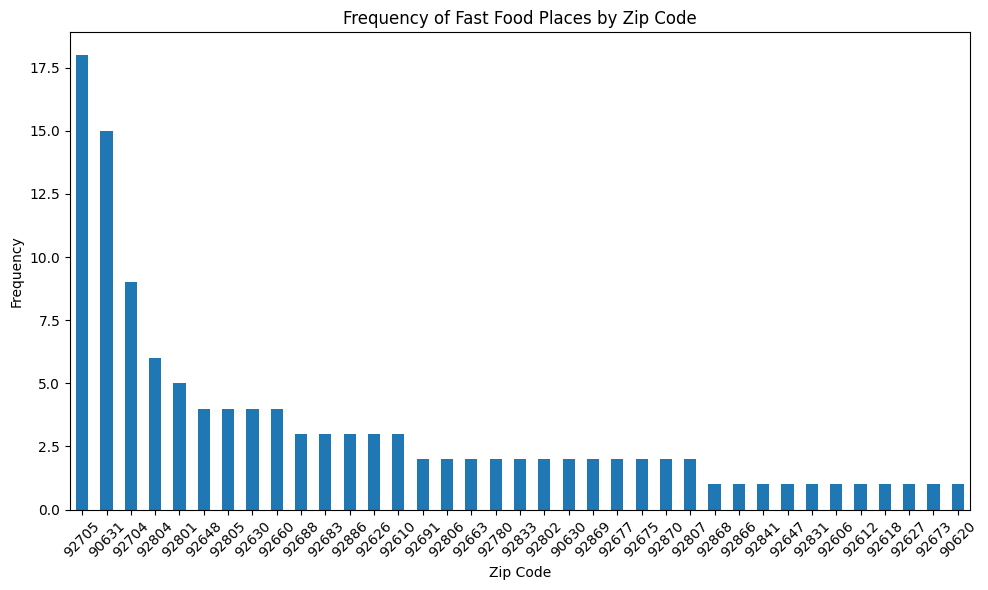

In [41]:
# Plotting the frequency of fast food places by zip code
plt.figure(figsize=(10, 6))
zipcode_counts.plot(kind='bar')
plt.title('Frequency of Fast Food Places by Zip Code')
plt.xlabel('Zip Code')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
